<a href="https://colab.research.google.com/github/khaledhassann/QR-Code-Reader/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np

## Plotting qr codes and their grayscale histograms

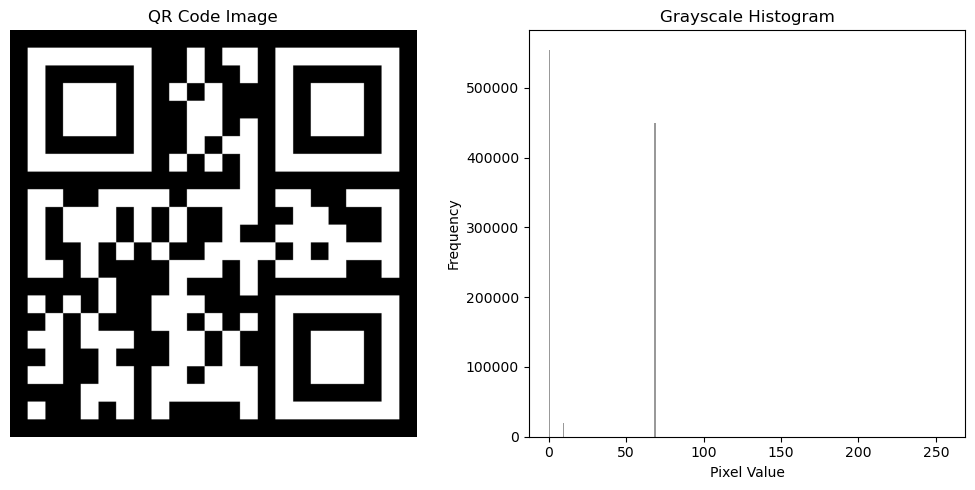

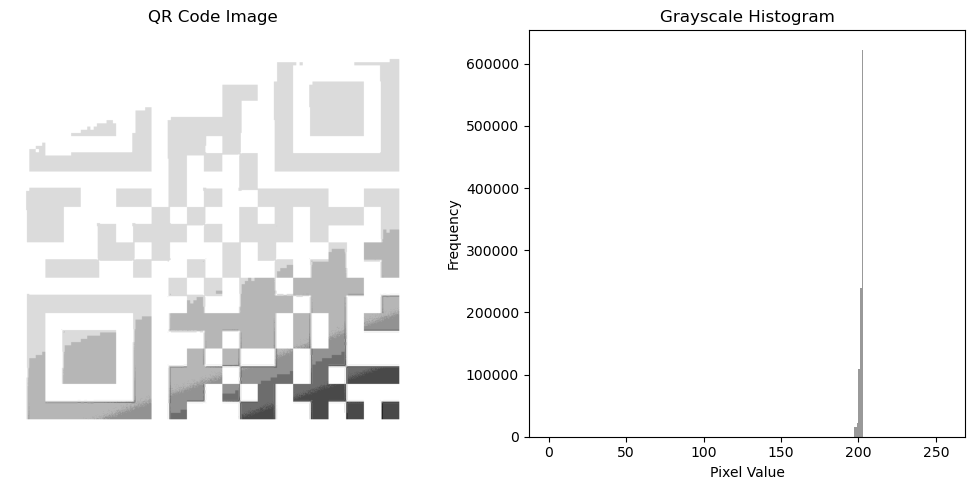

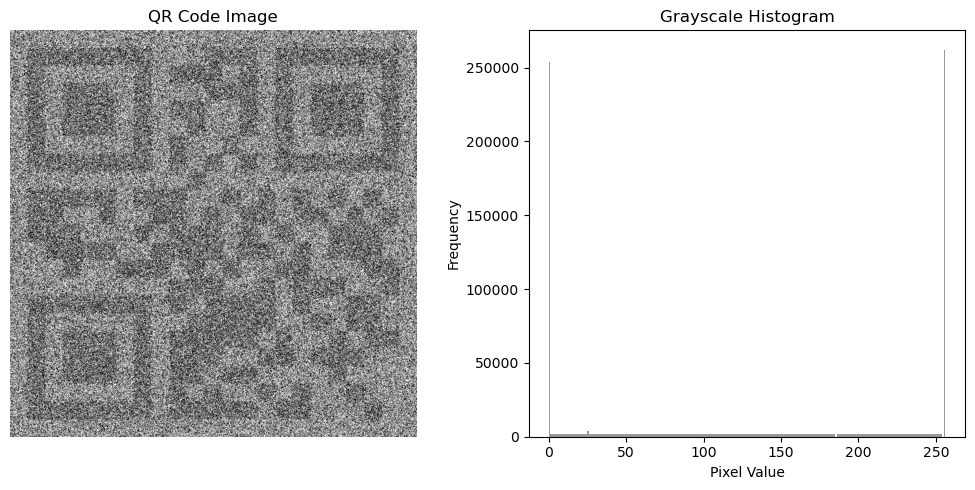

In [5]:
import cv2
import matplotlib.pyplot as plt

# Function to read an image and plot its histogram
def plot_image_and_histogram(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Plot the image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('QR Code Image')
    plt.axis('off')

    # Plot the histogram
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.8)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Grayscale Histogram')

    # Show the plot
    plt.tight_layout()
    plt.show()

# List of QR code image paths
qr_images = [
    'images/01-Getting-started.png', 'images/02-Matsawar-3edel-ya3am.png','images/03-Leffy-bina-ya-donya.png', 'images/04-Black-mirror.png','images/05-Caesar-cipher.png','images/06-Railfence-cipher.png', 'images/07-THE-MIGHTY-FINGER.png', 'images/08-Compresso-Espresso.png','images/09-My-phone-fell-while-taking-this-one-...-or-did-it.png', 'images/10-Gone-With-The-Wind.png', 'images/11-weewooweewooweewoo.png', 'images/12-mal7-w-felfel.png', 'images/13-2el-noor-2ata3.png', 'images/14-BANANAAA!!!.png', 'images/15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg', 'images/16-V3-QR-Code...-can-you-do-it.png'
             ]

khaled_qr_images = ['images/04-Black-mirror.png', 'images/10-Gone-With-The-Wind.png', 'images/12-mal7-w-felfel.png']

# Plot each QR code and its histogram
for qr_image in khaled_qr_images:
    plot_image_and_histogram(qr_image)


# Trail



In [ ]:
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gs_img)


NameError: name 'img' is not defined

In [ ]:
# Apply Gaussian blur to reduce noise
#blurred = cv2.GaussianBlur(gs_img, (5, 5), 0)
#cv2_imshow(blurred)

In [ ]:
# Thresholding
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [ ]:
# Apply Canny edge detection
edges = cv2.Canny(thresh, 50, 150)
cv2_imshow(edges)

In [ ]:
# Apply hough transfrom and fill the inside of the othline black
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=100)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

In [ ]:
# # Apply Gaussian blur to reduce noise
# blurred_2 = cv2.GaussianBlur(mask, (19, 19), 0)
# cv2_imshow(blurred_2)

In [ ]:
# # Apply Canny edge detection
# edges_2 = cv2.Canny(blurred_2, 50, 150)
# cv2_imshow(edges_2)

In [ ]:
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours to find hexagons (6 sides) with maximum perimeter
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) :  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)
#cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
#print(len(contours))
# Display the original image with detected edges
cv2_imshow(img)

In [ ]:
import cv2

# Load the image
image = cv2.imread('/content/14-BANANAAA!!!.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# Approximate polygonal curves
approx_contours = [cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True) for cnt in contours]

# Find bounding boxes
bounding_boxes = [cv2.boundingRect(cnt) for cnt in approx_contours]

# Filter bounding boxes based on aspect ratio and area
filtered_boxes = [box for box in bounding_boxes if 0.9 < box[2] / box[3] < 1.1 and cv2.contourArea(approx_contours[bounding_boxes.index(box)]) > 100]

# Draw the outer frame
for box in filtered_boxes:
    x, y, w, h = box
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Trial 2

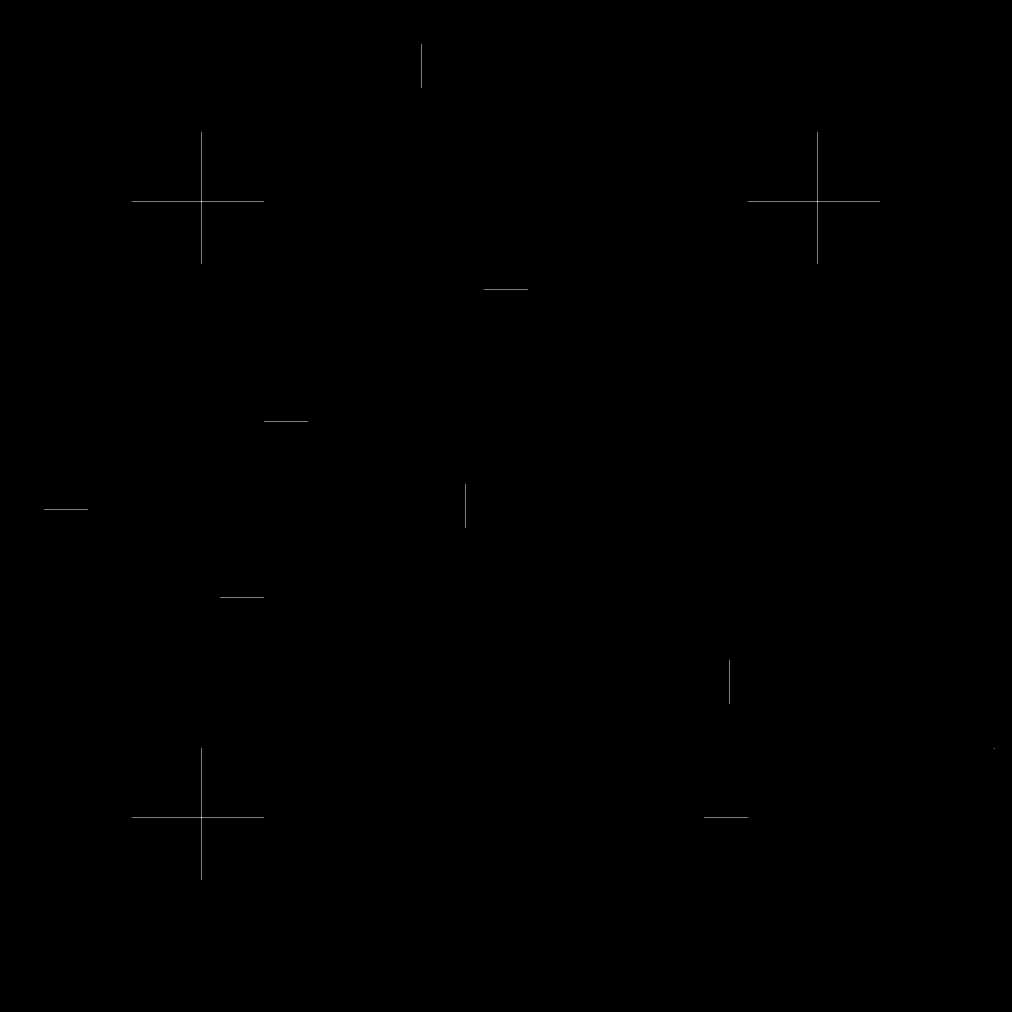

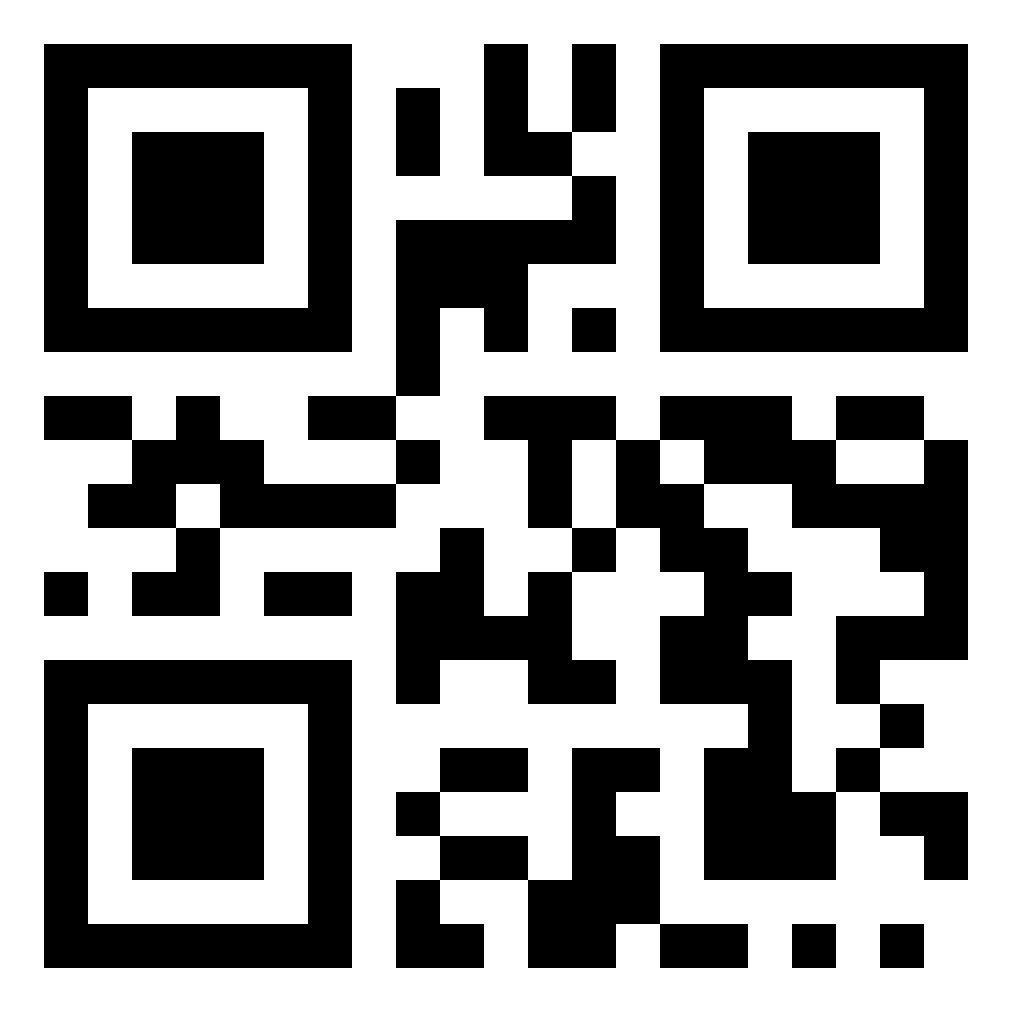

In [ ]:
def isLocator(curr_integral, last_3_integrals):

  if len(last_3_integrals)<2:
    last_3_integrals.append(curr_integral)
    return False

  elif len(last_3_integrals)<3:
    last_3_integrals.append(curr_integral)

  else:
    last_3_integrals.pop(0)
    last_3_integrals.append(curr_integral)


  f,s,t = last_3_integrals[:3]
  if (abs(s-t) < 5) and (abs(f-3*s) < 6):
    return True
  else:
    return False





# Load the image
img = cv2.imread('/content/01-Getting-started.png')
# Create a black mask image
integral = np.zeros_like(img)

gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)

# finding the image integral
h, w = thresh.shape[:2]
state = 255
count = 0
last_3_integrals = []
for i in range(h):

  for j in range(w):

    if thresh[i][j] == state:
      count += 1
    else:
      state = 0 if state == 255 else 255
      #integral[i][j] = count
      if isLocator(count, last_3_integrals):
        newJ = int(j-3.5*count)
        integral[i][newJ] += 127
      count = 0

for j in range(w):

  for i in range(h):

    if thresh[i][j] == state:
      count += 1
    else:
      state = 0 if state == 255 else 255
      #integral[i][j] = count
      if isLocator(count, last_3_integrals):
        newI = int(i-3.5*count)
        integral[newI][j] += 127
      count = 0

cv2_imshow(integral)
cv2_imshow(thresh)

In [ ]:
lines = cv2.HoughLinesP(integral, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/hough.cpp:485: error: (-215:Assertion failed) image.type() == CV_8UC1 in function 'HoughLinesProbabilistic'


# Testcase 1 (Normal)

In [ ]:
img = cv2.imread('/content/01-Getting-started.png')

In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(thresh, 50, 150)

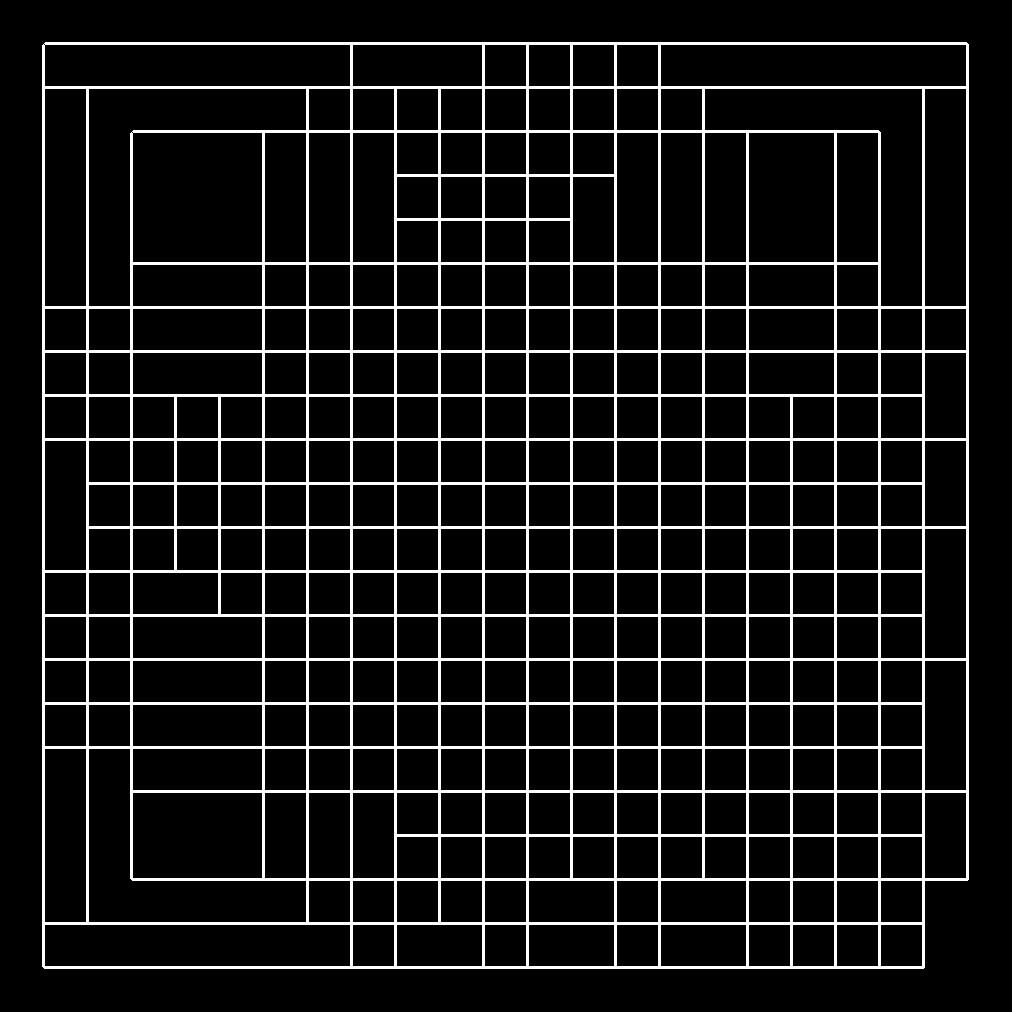

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

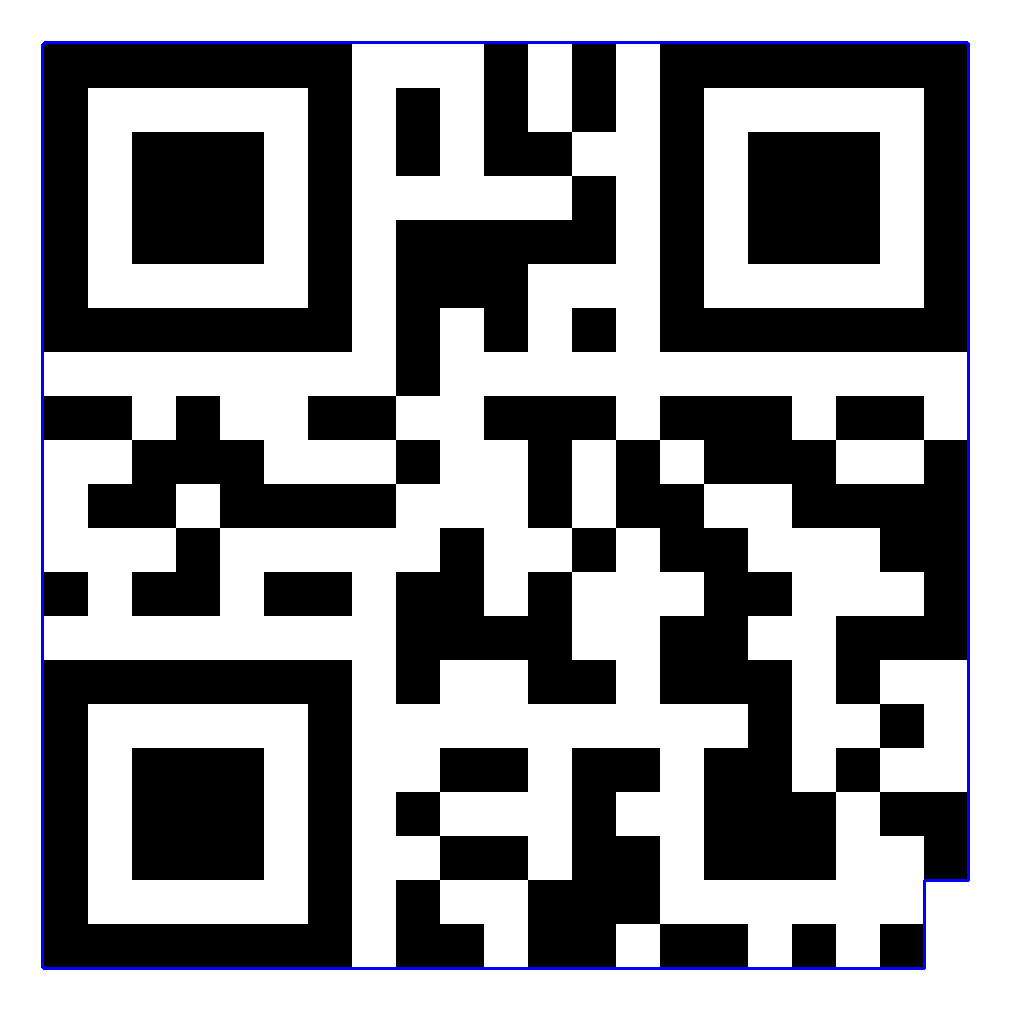

In [ ]:
# find contours in the mask

contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)

cv2_imshow(img)

# Testcase 2 (Shifted)

In [ ]:
img = cv2.imread('/content/02-Matsawar-3edel-ya3am.png')

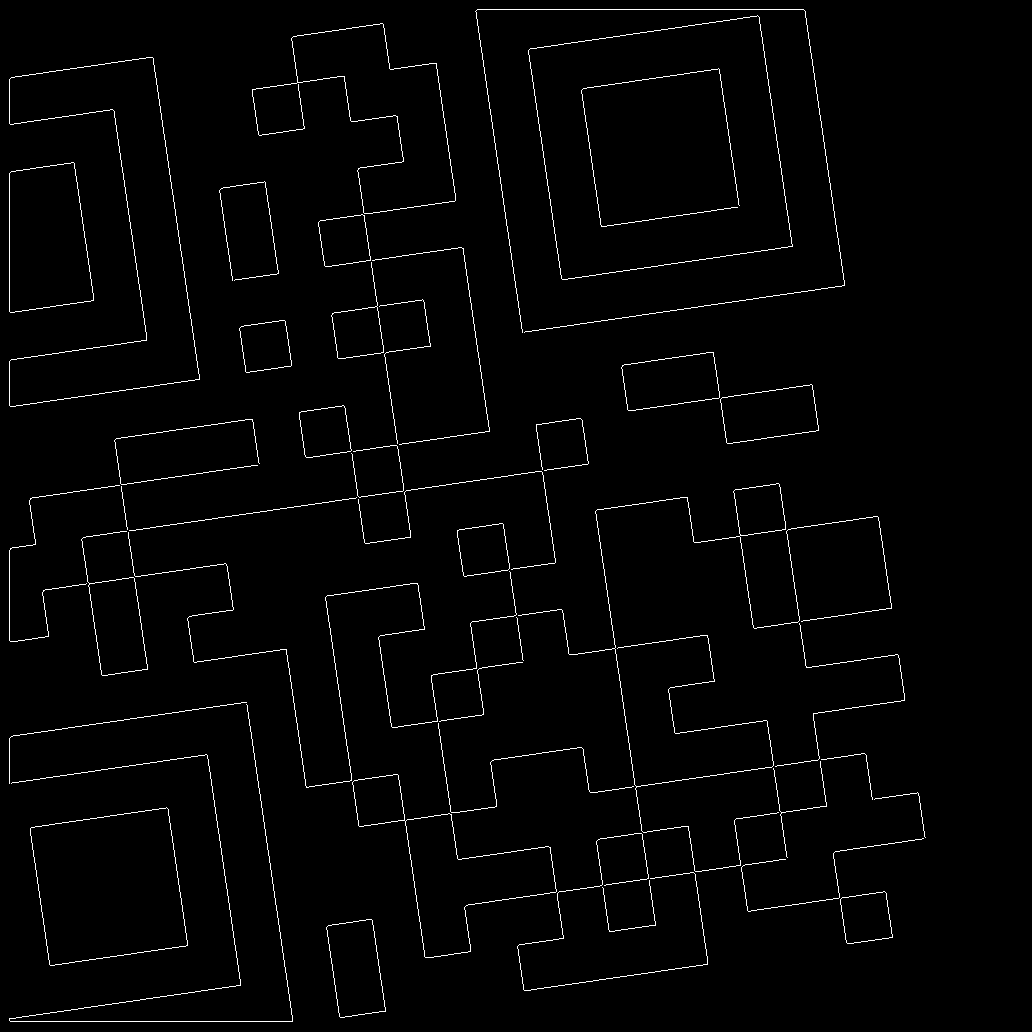

In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)

# Add padding so we can draw complete lines in the hough transform
padding = 10
padded_thresh = cv2.copyMakeBorder(thresh, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=255)
padded_edges = cv2.Canny(padded_thresh, 50, 150)
cv2_imshow(padded_edges)

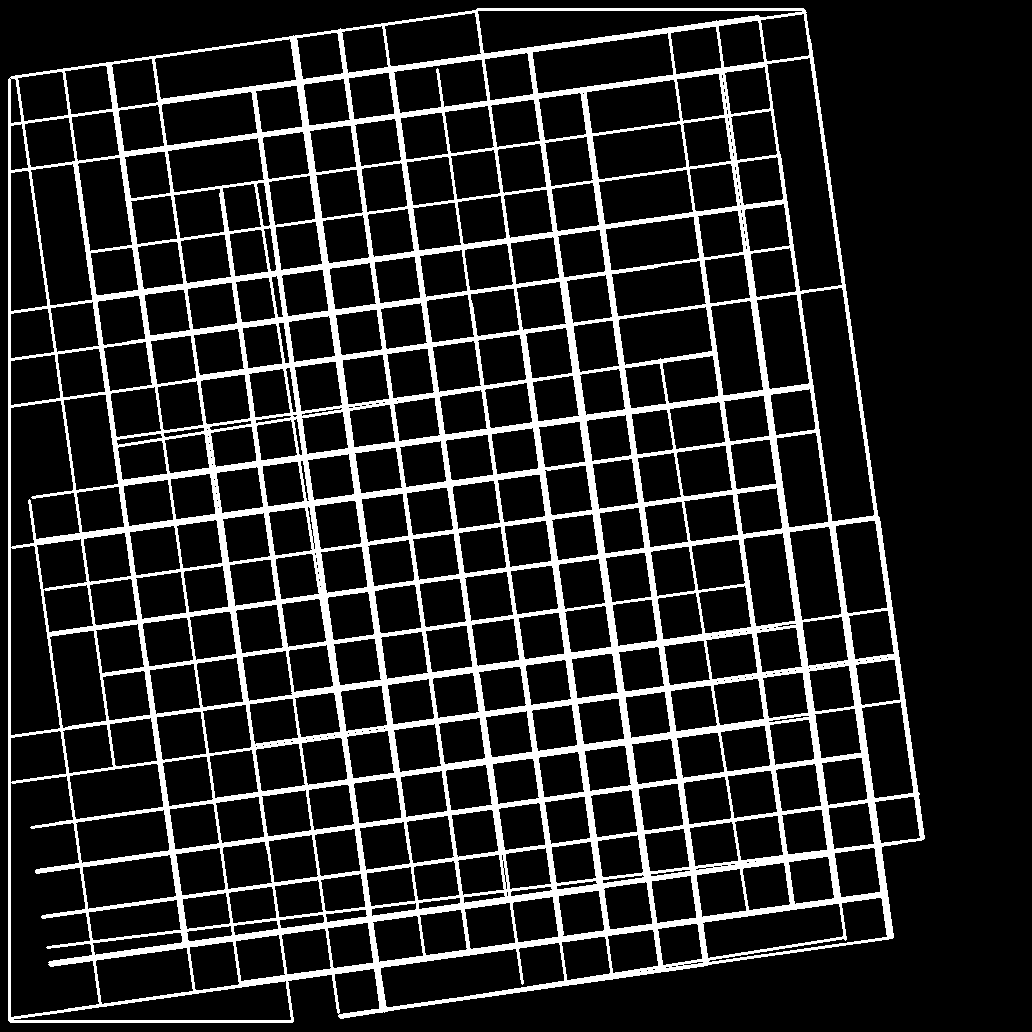

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(padded_edges, 1, np.pi / 180, threshold=35, minLineLength=250, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(padded_edges)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

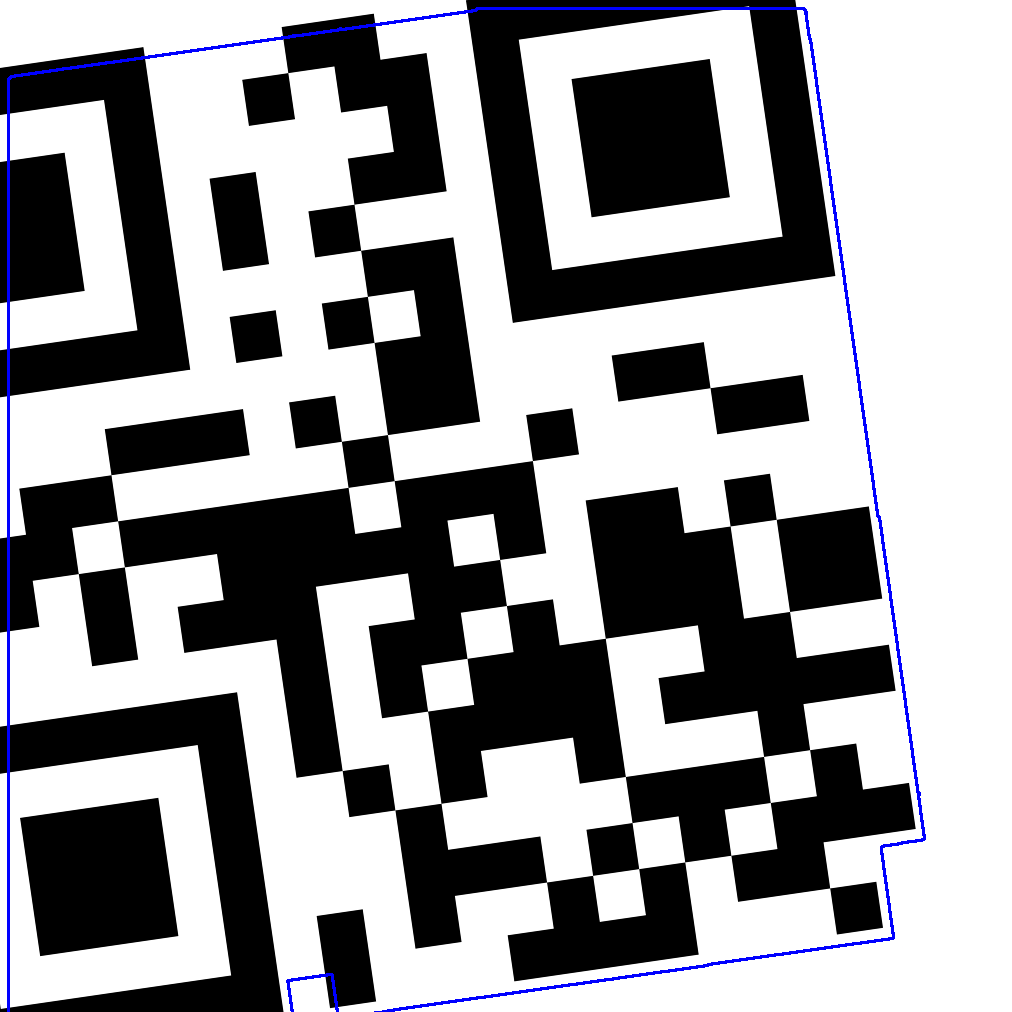

In [ ]:
# find contours in the mask

contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx):  # Filter squares
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour
            # Draw the approximated contour in green
            #cv2.polylines(img, [approx], isClosed=True, color=(0, 255, 0), thickness=2)

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)


cv2_imshow(img)

# Testcase 3 (Upside-down)

In [ ]:
img = cv2.imread('/content/03-Leffy-bina-ya-donya.png')

In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(thresh, 50, 150)

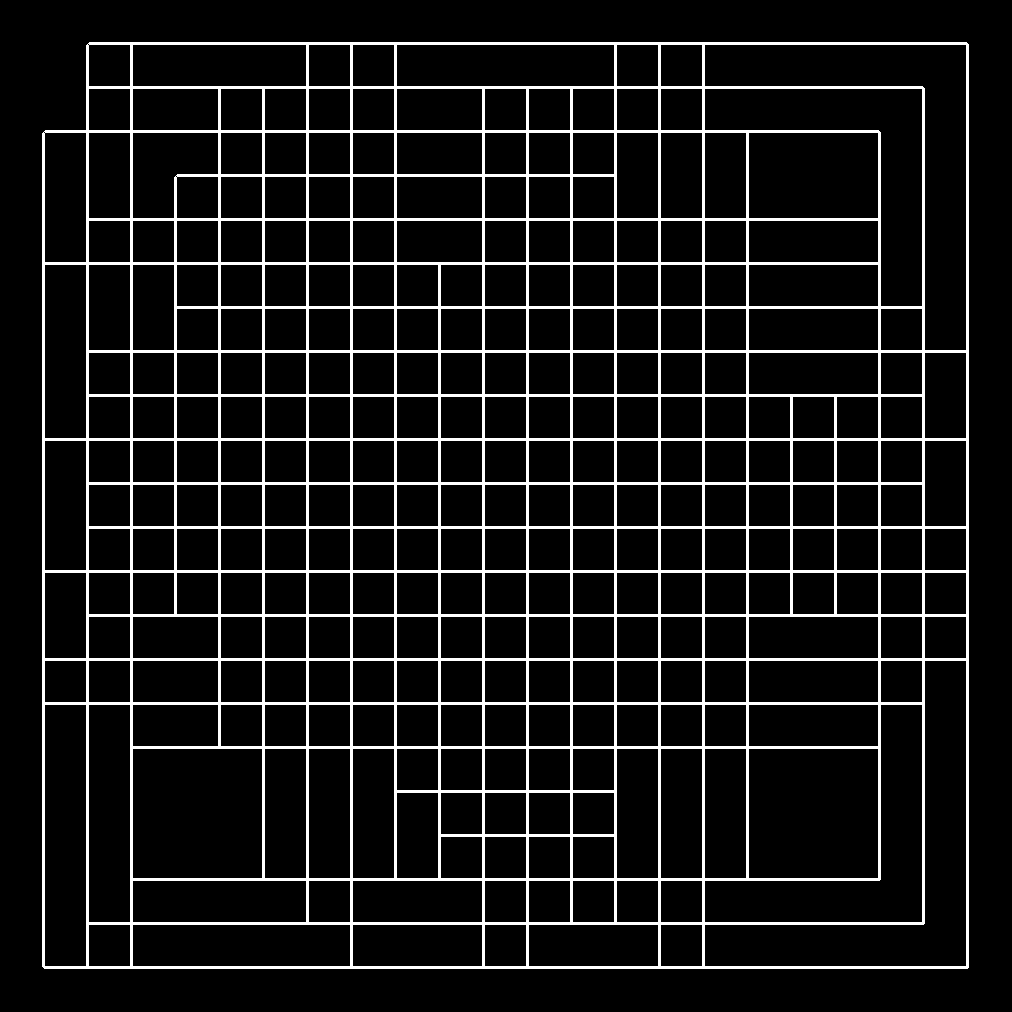

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

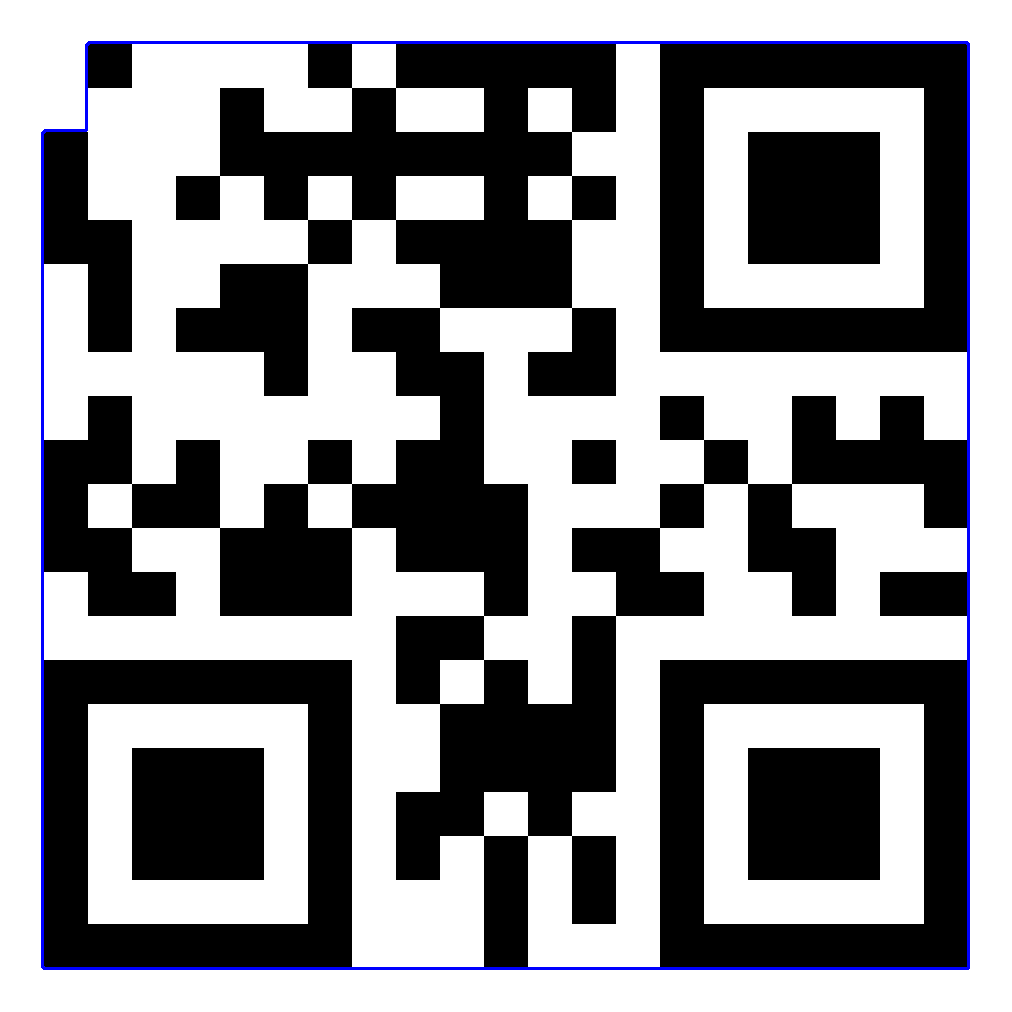

In [ ]:
# find contours in the mask

contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)

cv2_imshow(img)

# Testcase 4 (Inverted)

# Testcase 5 (Caesear cipher)

It seems that j values are shifted based on the i value of the pixel , let's analyze the image to find the key they had been shifted with

In [ ]:
img = cv2.imread('/content/05-Caesar-cipher.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = img.shape[:2]
# print(img.shape)
for i in range(h):
  for j in range(w-1, 0, -1):
    if img[i, j] == 0:
      print(f"{i} {j}")
      break



14 990
15 990
16 990
17 990
18 990
19 990
20 990
21 990
22 990
23 990
24 990
25 990
26 990
27 990
28 990
29 990
30 990
31 990
32 990
33 989
34 989
35 989
36 989
37 986
38 986
39 986
40 986
41 986
42 986
43 986
44 986
45 986
46 986
47 986
48 986
49 986
50 986
51 986
52 986
53 986
54 986
55 986
56 986
57 986
58 986
59 986
60 986
61 986
62 986
63 986
64 986
65 986
66 986
67 986
68 986
69 986
70 986
71 986
72 992
73 992
74 992
75 992
76 992
77 992
78 992
79 992
80 992
81 992
82 992
83 992
84 992
85 992
86 992
87 992
88 992
89 992
90 992
91 992
92 992
93 992
94 992
95 992
96 992
97 992
98 992
99 996
100 996
101 996
102 996
103 996
104 996
105 996
106 996
107 999
108 999
109 999
110 999
111 999
112 999
113 999
114 999
115 999
116 999
117 999
118 999
119 999
120 999
121 999
122 999
123 999
124 999
125 999
126 999
127 999
128 999
129 999
130 999
131 999
132 1000
133 1000
134 1000
135 1000
136 1000
137 1000
138 1000
139 1000
140 1000
141 990
142 990
143 990
144 990
145 990
146 990
147 990
148 9

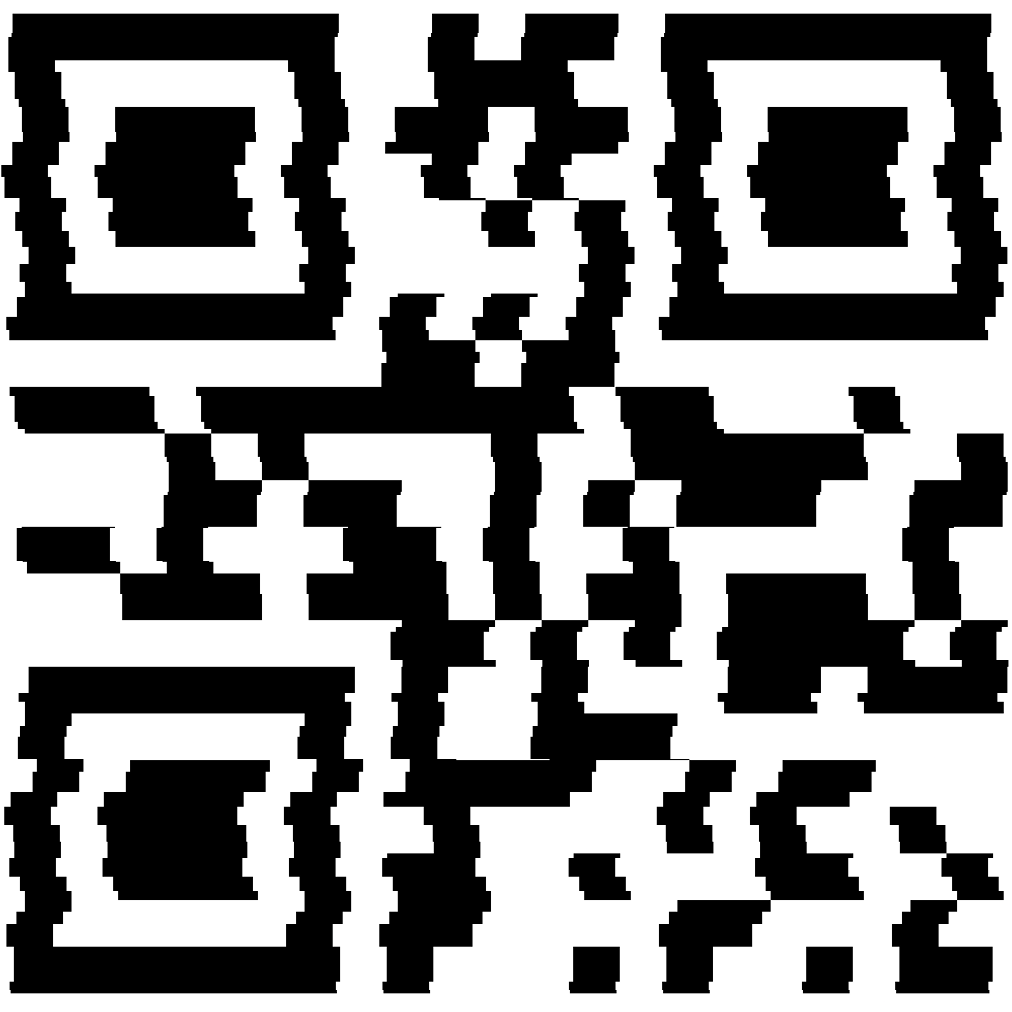

In [ ]:
img = cv2.imread('/content/05-Caesar-cipher.png')
mask = np.ones_like(img)
h, w = img.shape[:2]
for i in range(h):
  for j in range(w):
    x = i
    y = (j-10) % h
    mask[x, y] = img[i, j]

cv2_imshow(img)

# Testcase 6 (Rohmbus, Railfence cipher)

# Testcase 7 (Finger)

# Testcase 8 (Bahtana)

# Testcase 9 (Ink smudge)

# Testcase 10 (Grey photo)

# Testcase 11 (Vertical bar)

# Testcase 12 (Noisy)

# Testcase 13 (Black photo)

# Testcase 14 (Banana)

In [ ]:
img = cv2.imread('/content/14-BANANAAA!!!.png')

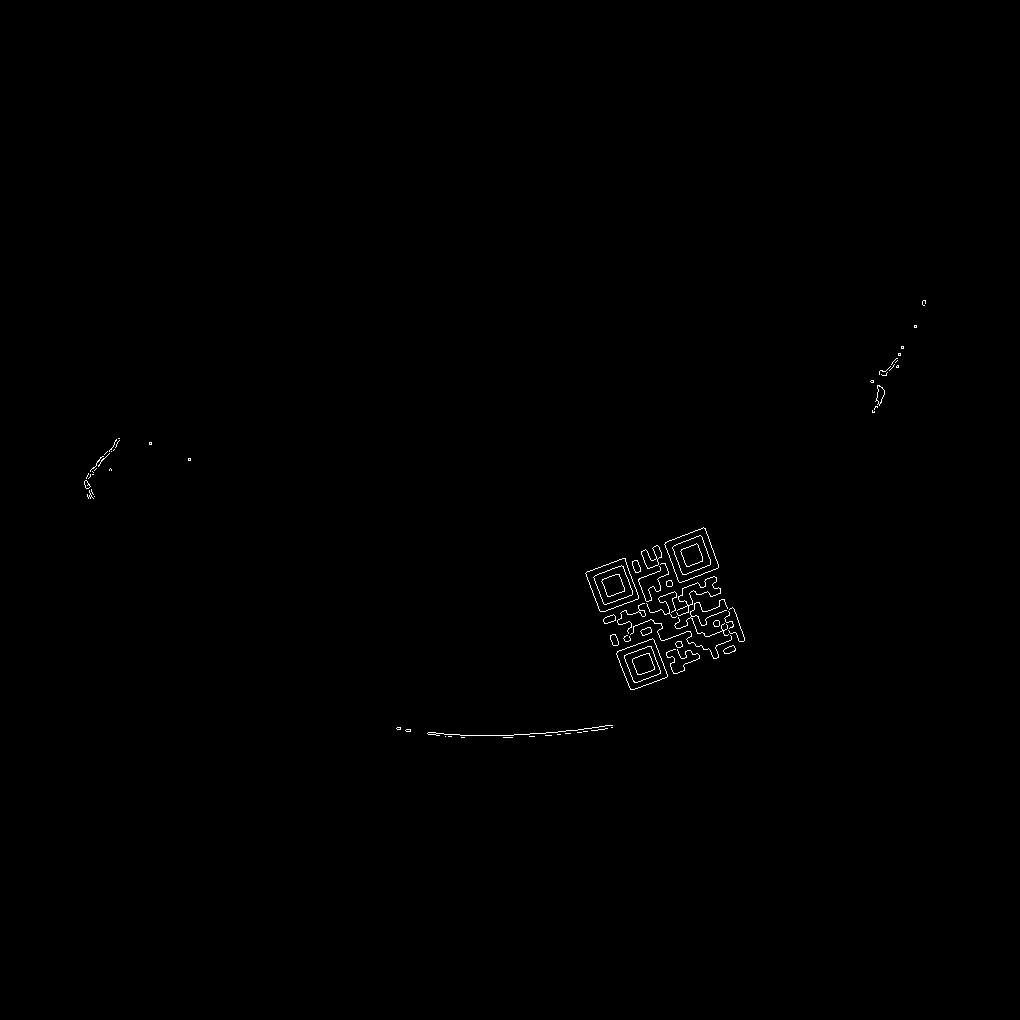

In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)

# Add padding so we can draw complete lines in the hough transform
padding = 10
padded_thresh = cv2.copyMakeBorder(thresh, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=255)
padded_edges = cv2.Canny(padded_thresh, 50, 150)
cv2_imshow(padded_edges)

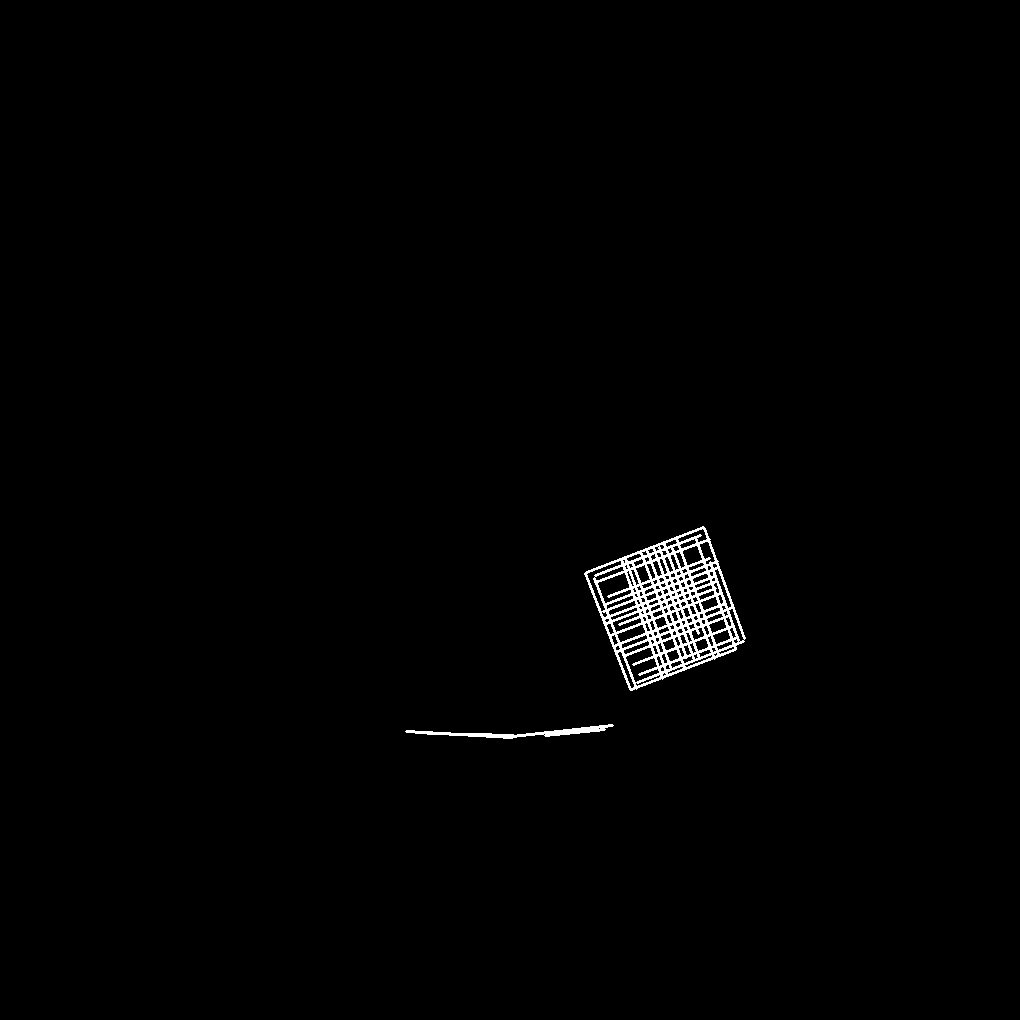

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(padded_edges, 1, np.pi / 180, threshold=30, minLineLength=50, maxLineGap=50)

# Create a black mask image
mask = np.zeros_like(padded_edges)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

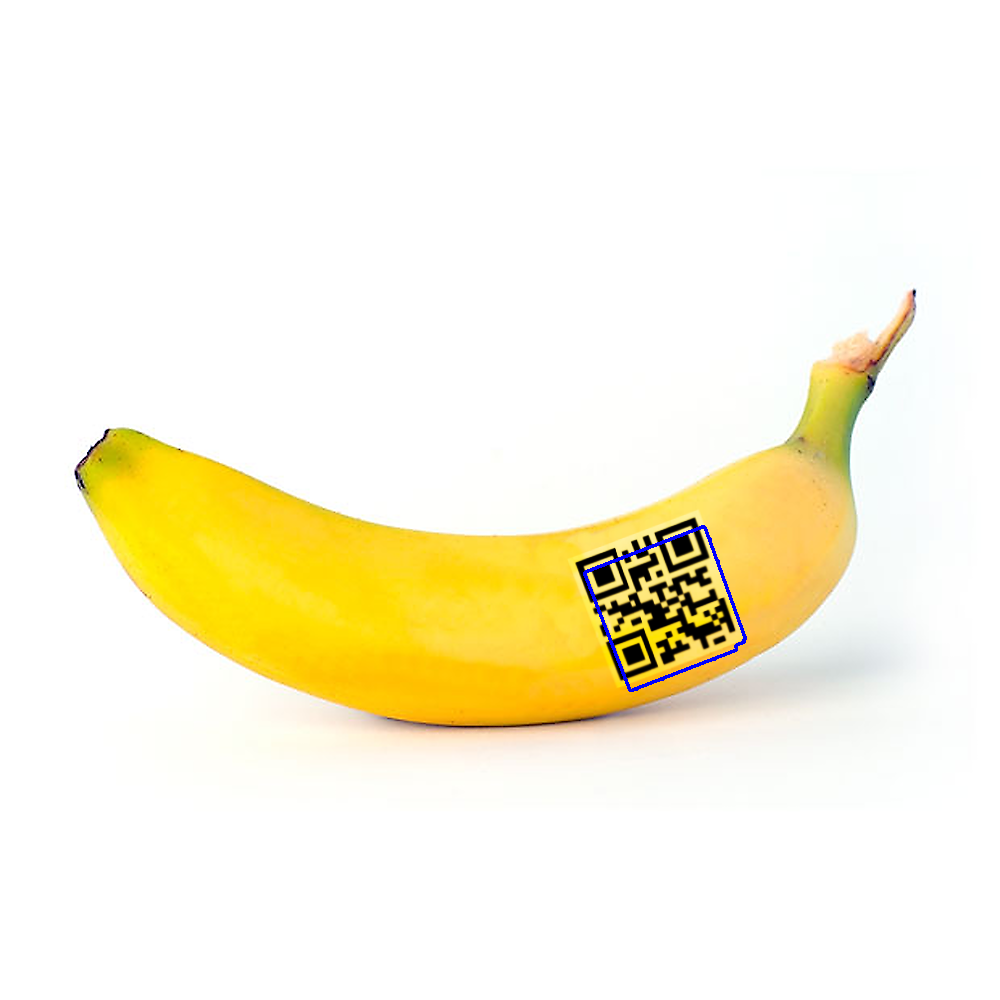

In [ ]:
# find contours in the mask
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter squares
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour
            # Draw the approximated contour in green
            #cv2.polylines(img, [approx], isClosed=True, color=(0, 255, 0), thickness=2)

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)


cv2_imshow(img)

# Testcase 15 (Wara2a ma2to3a)


# Testcase 16 (Big QR)

# Noise detection

In [ ]:
def detect_noise_type(image_gray, threshold=0.05):
    # Calculate the standard deviation of pixel intensities
    std_dev = np.std(image_gray)

    # Check for Gaussian noise based on standard deviation
    if std_dev < threshold * 255:
        return "Gaussian Noise"

    # Calculate the histogram of pixel intensities
    histogram = cv2.calcHist([image_gray], [0], None, [256], [0, 256])

    # Check for salt and pepper noise based on histogram spikes
    peak_ratio = np.sum(histogram[:10]) + np.sum(histogram[-10:])
    total_pixels = image_gray.shape[0] * image_gray.shape[1]
    if peak_ratio / total_pixels > 0.01:
        return "Salt and Pepper Noise"

    # Check for speckle noise based on local variance
    variance = cv2.Laplacian(image_gray, cv2.CV_64F).var()
    if variance < threshold:
        return "Speckle Noise"

    return "No Recognizable Noise"


# Example usage:
image_path = 'images/01-Getting-started.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

noise_type = detect_noise_type(gray_image)
print("Detected Noise Type:", noise_type)
